[*********************100%***********************]  1 of 1 completed

Fetching NVIDIA stock data...
Sample stock data:
               Open     High      Low    Close  Adj Close     Volume
Date                                                                
2018-01-02  4.89450  4.98750  4.86250  4.98375   4.929883  355616000
2018-01-03  5.10250  5.34250  5.09375  5.31175   5.254336  914704000
2018-01-04  5.39400  5.45125  5.31725  5.33975   5.282032  583268000
2018-01-05  5.35475  5.42275  5.27700  5.38500   5.326795  580124000
2018-01-08  5.51000  5.62500  5.46450  5.55000   5.490011  881216000

Training models and evaluating performance...
Linear Regression - MSE: 0.4033, R² Score: 0.9975


Random Forest - MSE: 0.4954, R² Score: 0.9970
XGBoost - MSE: 0.6101, R² Score: 0.9963

Visualizing predictions...


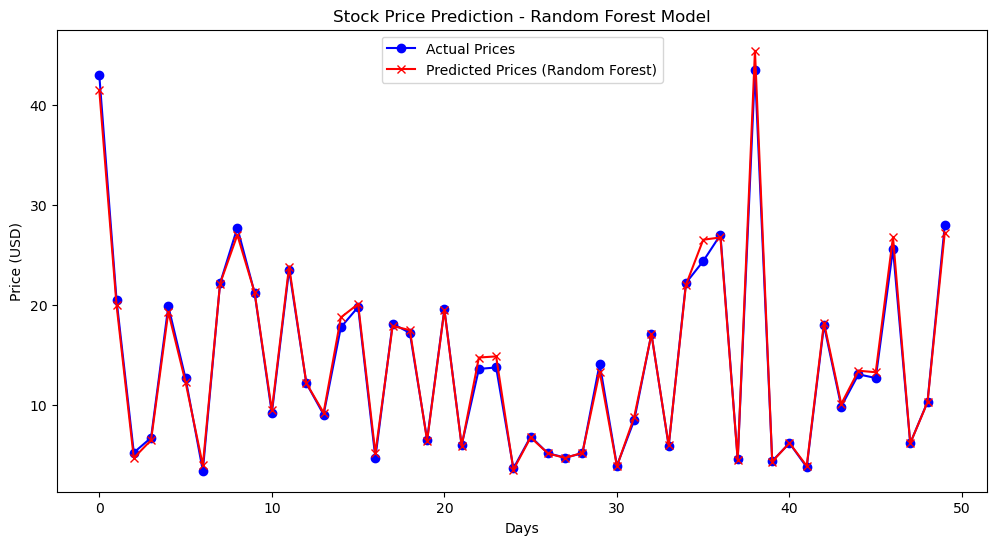


Analyzing feature importance...


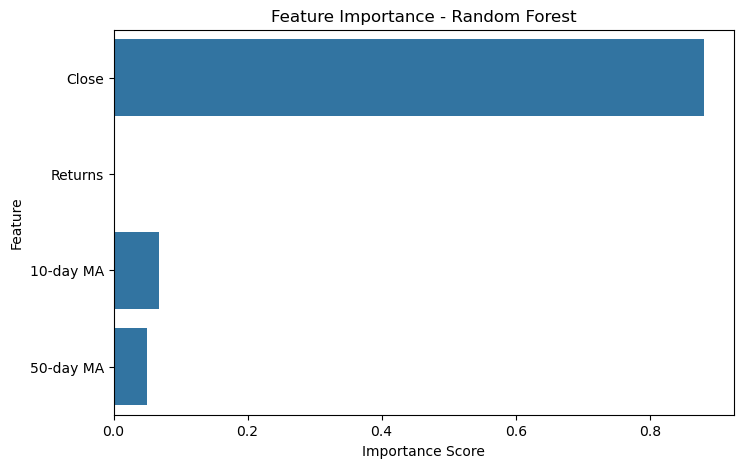


Project completed! You now have a predictive model for NVIDIA's stock prices.


In [3]:
# Import necessary libraries
# yfinance: Fetch stock data, pandas & numpy: Data manipulation, sklearn: Machine learning, matplotlib & seaborn: Visualization
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Collect Stock Data
# Let's choose NVIDIA (stock symbol: NVDA) and fetch its historical data
print("Fetching NVIDIA stock data...")
stock_symbol = "NVDA"
start_date = "2018-01-01"
end_date = "2024-01-01"

# Download stock data using Yahoo Finance API
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Check the first few rows of data to understand its structure
print("Sample stock data:")
print(stock_data.head())

# Step 2: Data Preprocessing
# We'll engineer some features to help our model make better predictions

# Focus on the 'Close' price (daily closing price of the stock)
stock_data = stock_data[['Close']].dropna()

# Create new features:
# 1. Daily returns (percentage change in price)
stock_data['Returns'] = stock_data['Close'].pct_change()

# 2. 10-day and 50-day moving averages (average closing prices over the last 10 or 50 days)
stock_data['10-day MA'] = stock_data['Close'].rolling(window=10).mean()
stock_data['50-day MA'] = stock_data['Close'].rolling(window=50).mean()

# Drop rows with missing values (due to moving average calculations)
stock_data.dropna(inplace=True)

# Create a target variable: Predict the "next day's closing price"
stock_data['Future Price'] = stock_data['Close'].shift(-1)
stock_data.dropna(inplace=True)

# Split data into features (X) and target (y)
X = stock_data[['Close', 'Returns', '10-day MA', '50-day MA']]
y = stock_data['Future Price']

# Step 3: Train-Test Split
# We'll use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data to ensure models work well
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train Machine Learning Models
# We'll try three models: Linear Regression, Random Forest, and XGBoost
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store results
results = {}

print("\nTraining models and evaluating performance...")
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R² Score": r2}

    # Print the results
    print(f"{name} - MSE: {mse:.4f}, R² Score: {r2:.4f}")

# Step 5: Visualize Predictions
# Let's plot actual vs. predicted stock prices for the Random Forest model
print("\nVisualizing predictions...")
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:50], label="Actual Prices", color='blue', marker='o')
plt.plot(models["Random Forest"].predict(X_test_scaled)[:50], label="Predicted Prices (Random Forest)", color='red', marker='x')
plt.title("Stock Price Prediction - Random Forest Model")
plt.xlabel("Days")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# Step 6: Feature Importance
# Let's see which features the Random Forest model found most important
print("\nAnalyzing feature importance...")
feature_importances = models["Random Forest"].feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

print("\nProject completed! You now have a predictive model for NVIDIA's stock prices.")